In [1]:
import ast
import re
import nltk
import spacy
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.rcdefaults()

2023-12-13 15:51:43.602850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
stops = stopwords.words('english')
punct = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

In [3]:
punct.update(["''", '``'])

In [4]:
stops.append("'s")

In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
df.genres = df.genres.apply(lambda x: ast.literal_eval(x))
df = df[df['genres'].map(lambda d: len(d)) > 0]

In [7]:
df = df[df['genres'].notna()]
df = df[df['overview'].notna()]

In [8]:
c_genres = Counter()
c_genres_per_film = Counter()
for i in range(len(df)):
    genres = df.iloc[i].genres
    c_genres_per_film[len(genres)] += 1
    for g in genres:
        c_genres[g['name']] += 1
print(c_genres)
print(c_genres_per_film)


Counter({'Drama': 2296, 'Comedy': 1722, 'Thriller': 1274, 'Action': 1154, 'Romance': 894, 'Adventure': 790, 'Crime': 696, 'Science Fiction': 535, 'Horror': 519, 'Family': 513, 'Fantasy': 424, 'Mystery': 348, 'Animation': 234, 'History': 197, 'Music': 185, 'War': 144, 'Documentary': 108, 'Western': 82, 'Foreign': 34, 'TV Movie': 8})
Counter({3: 1525, 2: 1490, 1: 897, 4: 636, 5: 187, 6: 33, 7: 4})


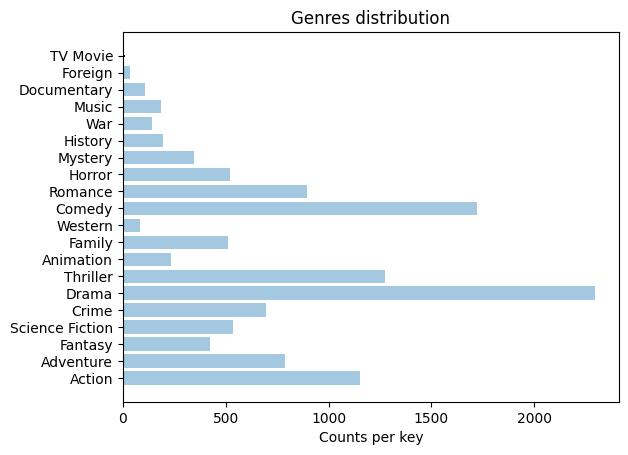

In [9]:
keys = c_genres.keys()
y_pos = np.arange(len(keys))
performance = [c_genres[k] for k in keys]
error = np.random.rand(len(keys))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Counts per key')
plt.title('Genres distribution')

plt.show()

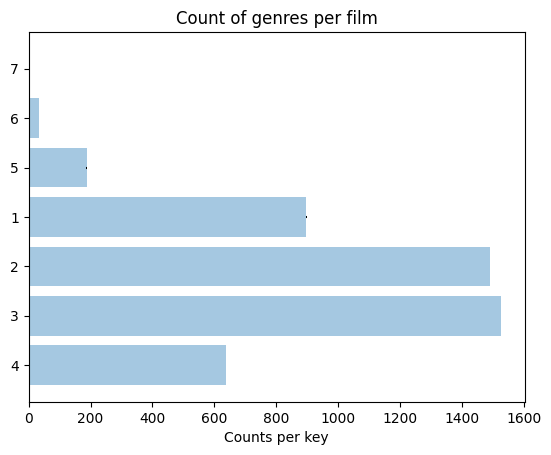

In [10]:
keys = c_genres_per_film.keys()
y_pos = np.arange(len(keys))
performance = [c_genres_per_film[k] for k in keys]
error = np.random.rand(len(keys))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Counts per key')
plt.title('Count of genres per film')

plt.show()

In [11]:
genre_overview_words = {}
for i in range(len(df)):
    genres = df.iloc[i].genres
    words_overview = word_tokenize(df.iloc[i].overview)
    for g in genres:
        for w in words_overview:
            if w not in punct and w.lower() not in stops:
                if g['name'] not in genre_overview_words.keys():
                    genre_overview_words[g['name']] = []
                else:
                    genre_overview_words[g['name']].append(lemmatizer.lemmatize(w.lower()))

______________________________________________
Genre: Action
[('world', 187), ('find', 186), ('life', 168), ('one', 166), ('must', 165), ('new', 160), ('man', 134), ('two', 131), ('take', 126), ('get', 120), ('young', 118), ('war', 117), ('team', 116), ('agent', 116), ('force', 109), ('year', 103), ('time', 99), ('city', 96), ('family', 95), ('mission', 90)]


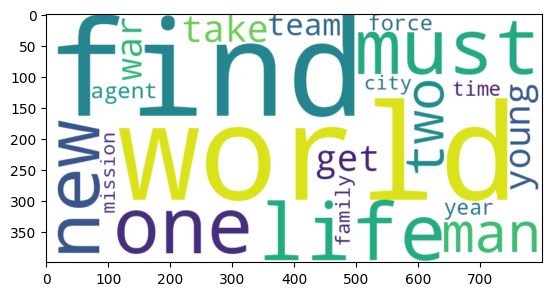

______________________________________________
Genre: Adventure
[('world', 175), ('find', 171), ('life', 124), ('new', 124), ('must', 122), ('one', 107), ('young', 105), ('two', 95), ('take', 86), ('friend', 82), ('save', 80), ('war', 76), ('set', 74), ('force', 73), ('man', 71), ('year', 70), ('time', 70), ('help', 69), ('adventure', 67), ('get', 66)]


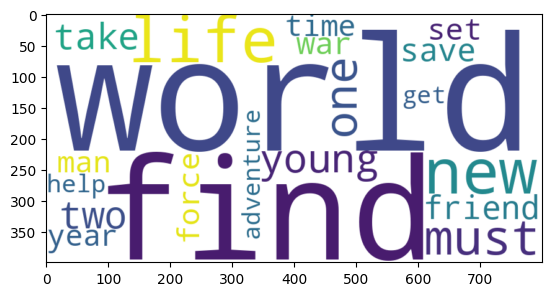

______________________________________________
Genre: Fantasy
[('world', 104), ('find', 87), ('life', 84), ('must', 69), ('young', 68), ('evil', 65), ('new', 64), ('one', 54), ('man', 49), ('love', 48), ('family', 47), ('get', 45), ('power', 45), ('time', 44), ('take', 43), ('save', 43), ('--', 43), ('year', 38), ('back', 37), ('help', 37)]


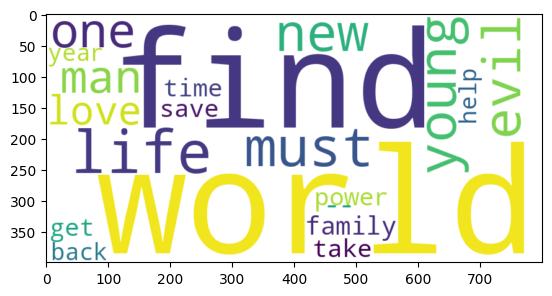

______________________________________________
Genre: Science Fiction
[('world', 129), ('find', 108), ('earth', 100), ('life', 91), ('one', 86), ('must', 82), ('planet', 81), ('year', 81), ('alien', 80), ('new', 78), ('time', 68), ('human', 67), ('man', 64), ('two', 53), ('force', 53), ('young', 50), ('power', 50), ('future', 50), ('city', 49), ('take', 48)]


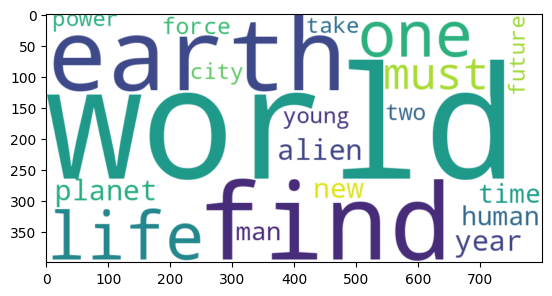

______________________________________________
Genre: Crime
[('life', 122), ('one', 115), ('find', 107), ('new', 98), ('police', 93), ('get', 88), ('two', 86), ('family', 85), ('take', 79), ('man', 77), ('murder', 77), ('cop', 71), ('drug', 69), ('story', 67), ('agent', 65), ('friend', 65), ('city', 64), ('young', 62), ('must', 60), ('make', 57)]


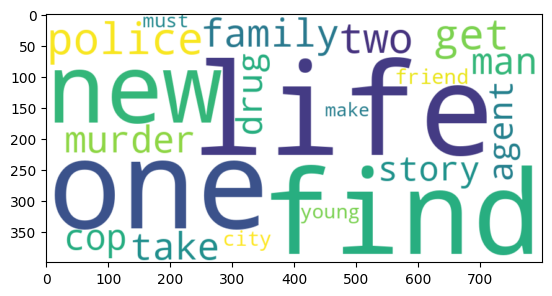

______________________________________________
Genre: Drama
[('life', 690), ('find', 361), ('story', 355), ('young', 339), ('family', 334), ('new', 330), ('one', 323), ('man', 299), ('love', 294), ('world', 275), ('two', 265), ('friend', 264), ('get', 237), ('year', 228), ('father', 228), ('woman', 222), ('take', 217), ('war', 175), ('mother', 163), ('wife', 161)]


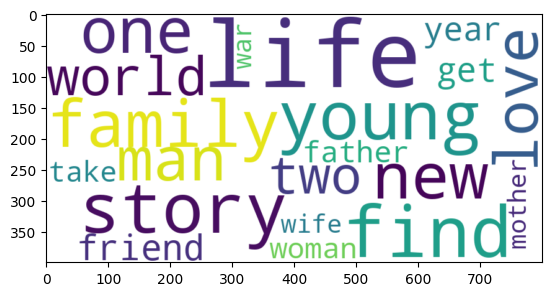

______________________________________________
Genre: Thriller
[('life', 239), ('find', 226), ('one', 185), ('new', 177), ('man', 162), ('young', 158), ('world', 141), ('must', 133), ('family', 132), ('take', 131), ('two', 130), ('get', 118), ('year', 113), ('agent', 108), ('secret', 108), ('story', 105), ('murder', 100), ('police', 92), ('woman', 89), ('becomes', 89)]


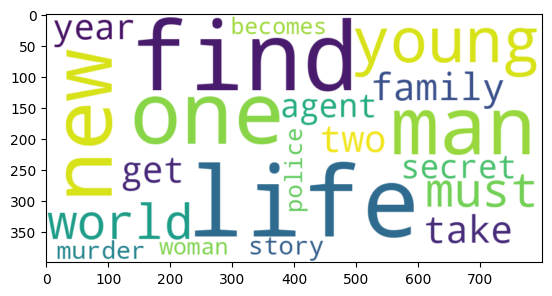

______________________________________________
Genre: Animation
[('world', 68), ('find', 59), ('new', 52), ('life', 50), ('friend', 43), ('one', 40), ('get', 39), ('adventure', 39), ('must', 39), ('young', 36), ('set', 33), ('save', 33), ('city', 27), ('home', 26), ('human', 26), ('way', 26), ('back', 26), ('named', 25), ('family', 25), ('two', 24)]


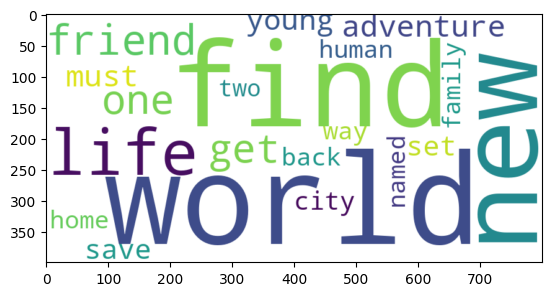

______________________________________________
Genre: Family
[('world', 120), ('find', 115), ('life', 113), ('friend', 103), ('new', 95), ('get', 87), ('young', 86), ('family', 82), ('must', 74), ('one', 73), ('boy', 66), ('adventure', 65), ('save', 62), ('father', 59), ('take', 57), ('back', 56), ('help', 51), ('home', 48), ('time', 48), ('named', 48)]


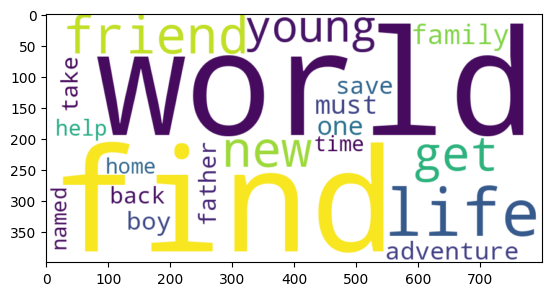

______________________________________________
Genre: Western
[('town', 24), ('west', 17), ('gang', 16), ('outlaw', 16), ('find', 15), ('young', 15), ('brother', 14), ('war', 13), ('take', 13), ('sheriff', 12), ('friend', 12), ('man', 12), ('one', 11), ('old', 11), ('father', 11), ('woman', 11), ('men', 10), ('texas', 10), ('john', 10), ('ranger', 9)]


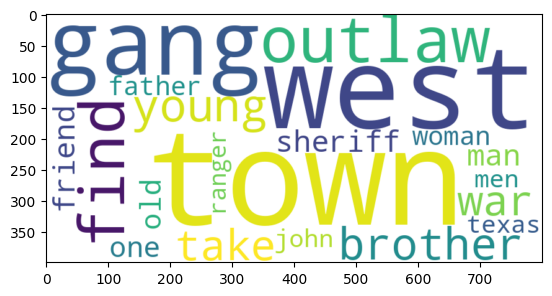

______________________________________________
Genre: Comedy
[('life', 382), ('find', 301), ('new', 286), ('friend', 280), ('get', 270), ('one', 267), ('two', 222), ('love', 213), ('family', 191), ('man', 187), ('world', 183), ('take', 174), ('young', 172), ('woman', 160), ("n't", 159), ('must', 148), ('year', 146), ('--', 146), ('go', 144), ('school', 143)]


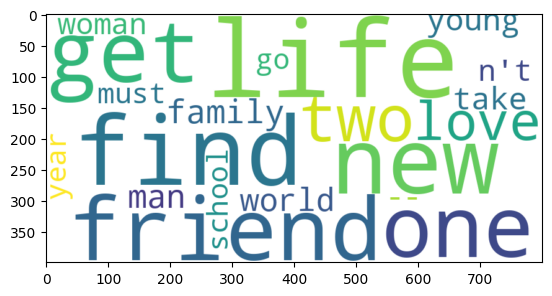

______________________________________________
Genre: Romance
[('life', 284), ('love', 270), ('find', 166), ('woman', 161), ('young', 154), ('one', 137), ('new', 136), ('friend', 131), ('man', 131), ('two', 127), ('get', 125), ('fall', 106), ('story', 101), ('world', 101), ('meet', 91), ('year', 88), ('girl', 87), ('family', 78), ('relationship', 77), ('take', 76)]


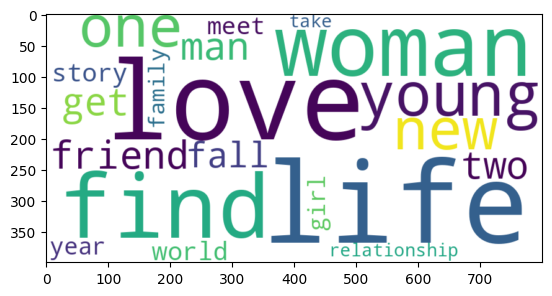

______________________________________________
Genre: Horror
[('life', 83), ('new', 83), ('one', 81), ('find', 78), ('young', 74), ('year', 71), ('group', 70), ('friend', 68), ('family', 66), ('begin', 56), ('town', 53), ('world', 51), ('must', 51), ('vampire', 49), ('take', 48), ('soon', 46), ('killer', 46), ('evil', 46), ('mysterious', 45), ('man', 45)]


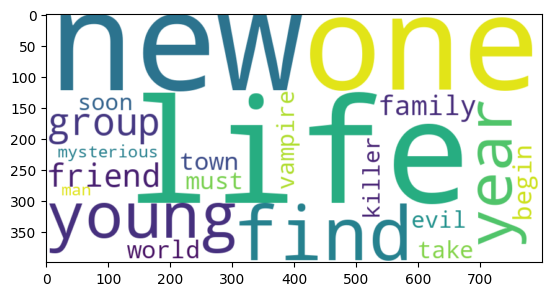

______________________________________________
Genre: Mystery
[('find', 79), ('life', 73), ('one', 58), ('man', 47), ('new', 45), ('young', 43), ('murder', 42), ('year', 40), ('world', 40), ('two', 36), ('begin', 36), ('must', 34), ('killer', 33), ('town', 33), ('mysterious', 32), ('secret', 30), ('becomes', 29), ('woman', 29), ('death', 29), ('family', 28)]


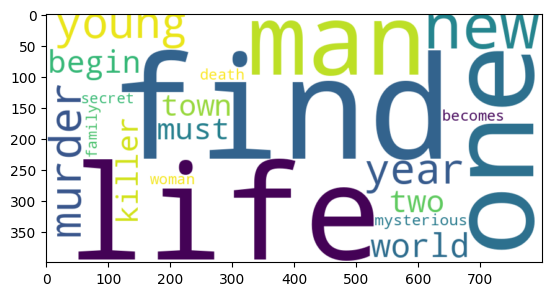

______________________________________________
Genre: History
[('war', 61), ('story', 54), ('life', 40), ('world', 39), ('army', 29), ('film', 28), ('american', 23), ('find', 22), ('one', 22), ('british', 22), ('set', 22), ('love', 21), ('’', 21), ('man', 20), ('king', 19), ('battle', 18), ('year', 18), ('true', 18), ('ii', 17), ('team', 16)]


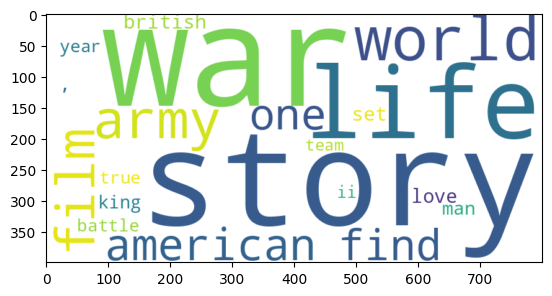

______________________________________________
Genre: War
[('war', 86), ('world', 46), ('army', 37), ('american', 27), ('ii', 27), ('find', 26), ('soldier', 25), ('life', 22), ('story', 21), ('young', 21), ('mission', 20), ('battle', 19), ('love', 16), ('british', 14), ('return', 14), ('take', 14), ('film', 14), ('fight', 13), ('one', 13), ('officer', 13)]


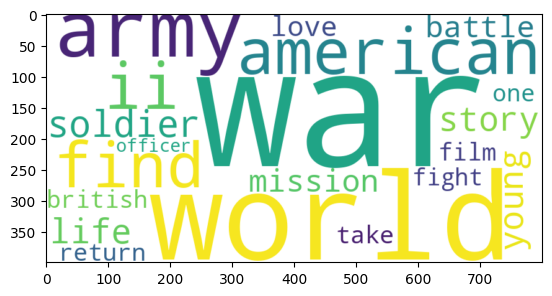

______________________________________________
Genre: Music
[('life', 55), ('one', 39), ('new', 36), ('music', 30), ('world', 28), ('band', 28), ('story', 28), ('musical', 26), ('singer', 24), ('dream', 22), ('show', 20), ('find', 20), ('school', 20), ('love', 20), ('get', 20), ('family', 19), ('girl', 18), ('young', 18), ('together', 18), ('film', 17)]


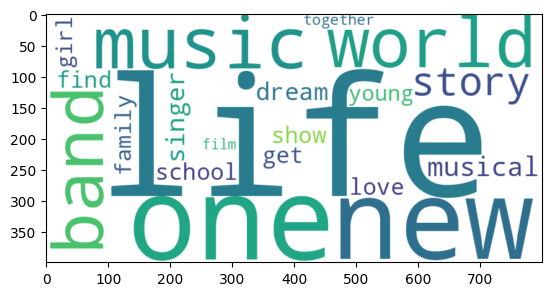

______________________________________________
Genre: Documentary
[('film', 44), ('documentary', 33), ('world', 27), ('life', 27), ('year', 22), ('american', 19), ('new', 19), ('story', 18), ('one', 18), ('time', 17), ('look', 17), ('america', 13), ('first', 13), ('journey', 13), ('movie', 12), ('filmmaker', 12), ('game', 12), ('interview', 11), ('michael', 11), ('music', 11)]


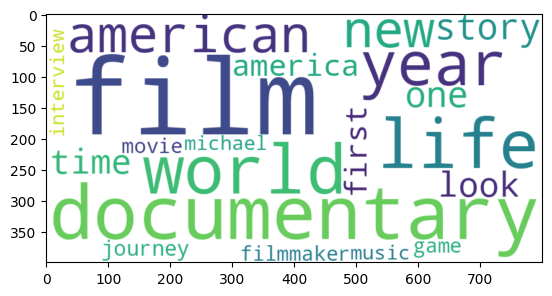

______________________________________________
Genre: Foreign
[('life', 12), ('son', 12), ('film', 8), ('young', 7), ('year', 7), ('family', 7), ('beautiful', 7), ('war', 6), ('relationship', 6), ('coleridge', 6), ('wordsworth', 6), ('find', 6), ('friend', 6), ('la', 6), ('girl', 6), ('story', 6), ('mother', 6), ('romeo', 6), ('gandhi', 6), ('man', 5)]


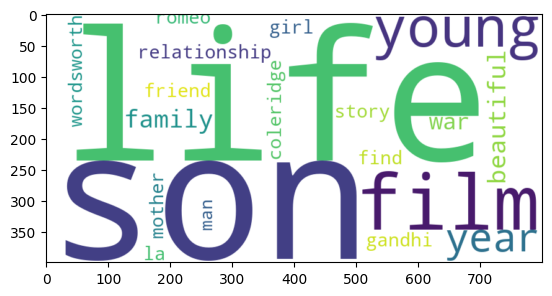

______________________________________________
Genre: TV Movie
[('missie', 5), ('eduardo', 4), ('daughter', 4), ('willie', 4), ('christmas', 4), ('woman', 3), ('find', 3), ('jayne', 3), ('husband', 3), ('son', 3), ('life', 3), ('mexico', 3), ('town', 3), ('family', 3), ('time', 3), ('school', 3), ('set', 3), ('teenage', 3), ('world', 2), ('ever', 2)]


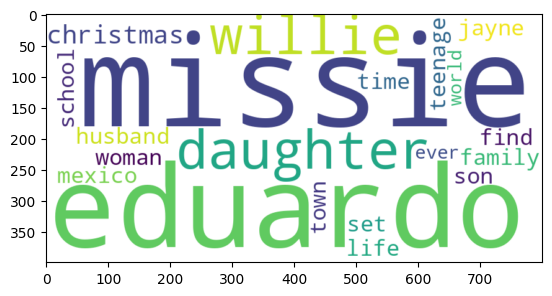

In [12]:
for k in c_genres.keys():
    print('______________________________________________')
    print(f'Genre: {k}')
    print(Counter(genre_overview_words[k]).most_common(20))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        dict(Counter(genre_overview_words[k]).most_common(20)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [15]:
data = df.overview.values

In [16]:
from nltk import sent_tokenize

for i in data:
    sents = sent_tokenize(i, 'russian')
    for s in sents:
        tokens = word_tokenize(s, 'russian', True)


In [17]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [18]:
data_cleaned = [clean_text(i) for i in data]

In [19]:
genres = df.genres.values

In [20]:
genres

array([list([{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]),
       list([{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]),
       list([{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]),
       ...,
       list([{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]),
       list([{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 10770, 'name': 'TV Movie'}]),
       list([{'id': 99, 'name': 'Documentary'}])], dtype=object)

In [21]:
genres_ = []
for g in genres:
    _ = []
    for i in g:
        _.append(i['name'])
    genres_.append(_)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned, genres_, random_state=42)

In [22]:
genres_

[['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Crime'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Animation', 'Family'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action', 'Science Fiction'],
 ['Adventure', 'Action', 'Thriller', 'Crime'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Western'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Drama', 'Action'],
 ['Drama', 'Romance

In [24]:
labels2int = {list(c_genres.keys())[i]: i for i in range(len(c_genres.keys()))}

In [25]:
labels2int

{'Action': 0,
 'Adventure': 1,
 'Fantasy': 2,
 'Science Fiction': 3,
 'Crime': 4,
 'Drama': 5,
 'Thriller': 6,
 'Animation': 7,
 'Family': 8,
 'Western': 9,
 'Comedy': 10,
 'Romance': 11,
 'Horror': 12,
 'Mystery': 13,
 'History': 14,
 'War': 15,
 'Music': 16,
 'Documentary': 17,
 'Foreign': 18,
 'TV Movie': 19}

In [26]:
genres_int = []
for i in genres_:
    genres_int.append([labels2int[_] for _ in i])

In [27]:
genres_int

[[0, 1, 2, 3],
 [1, 2, 0],
 [0, 1, 4],
 [0, 4, 5, 6],
 [0, 1, 3],
 [2, 0, 1],
 [7, 8],
 [0, 1, 3],
 [1, 2, 8],
 [0, 1, 2],
 [1, 2, 0, 3],
 [1, 0, 6, 4],
 [1, 2, 0],
 [0, 1, 9],
 [0, 1, 2, 3],
 [1, 8, 2],
 [3, 0, 1],
 [1, 0, 2],
 [0, 10, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1],
 [1, 2],
 [1, 2],
 [1, 5, 0],
 [5, 11, 6],
 [1, 0, 3],
 [6, 0, 1, 3],
 [0, 1, 3, 6],
 [0, 1, 6],
 [0, 1, 2],
 [0, 1, 3],
 [8, 2, 1],
 [1, 0, 3, 6],
 [7, 8],
 [3, 0, 1],
 [3, 0, 1],
 [2, 1, 8],
 [0, 1, 2],
 [1, 0, 3],
 [7, 8, 1, 10],
 [1, 0, 6, 3],
 [7, 8, 10],
 [0, 3, 6],
 [0],
 [0, 5, 12, 3, 6],
 [0, 1, 2, 3],
 [0, 1, 3],
 [0, 8, 2],
 [5, 11],
 [1, 2, 0, 11],
 [0, 3, 1],
 [0, 3, 1],
 [1, 0],
 [1, 7, 8],
 [7, 1, 10, 8, 0, 2],
 [0, 1, 3],
 [7, 8],
 [0, 10, 4, 6],
 [0, 1, 3],
 [7, 5],
 [3, 2, 0, 1],
 [0, 1],
 [1, 8, 2],
 [3],
 [5, 0, 4, 6],
 [7, 10, 8, 1],
 [7, 8, 1, 3],
 [0, 3, 1],
 [1, 5, 8],
 [0, 1, 10, 3, 9],
 [1, 0, 2],
 [0, 1, 4, 2, 3],
 [2, 10, 8],
 [0, 3],
 [1, 0],
 [1, 0, 6, 3],
 [5, 10, 7, 8],
 [8, 1, 5, 2],


In [28]:
classifiers = [LogisticRegression(random_state=42, class_weight='balanced') for i in range(len(c_genres))]

In [29]:
genres_int_variants = []
for i in range(len(c_genres)):
    _ = []
    for j in genres_int:
        if i in j:
            _.append(1)
        else:
            _.append(0)
    genres_int_variants.append(_)

In [30]:
genres_int_variants

[[1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,


In [48]:
#1-й подход
import sys
from sklearn.metrics import classification_report, roc_curve, accuracy_score, precision_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(42)
np.set_printoptions(threshold=sys.maxsize)

clf_best_threshold_acc = []
clf_best_threshold_f1 = []
clf_best_threshold_recall = []
clf_best_threshold_prec = []

clf_best_accuracy = []
clf_best_f1 = []
clf_best_recall = []
clf_best_precision = []
for i in range(len(classifiers)):
    vectorizer = TfidfVectorizer()

    X_train, X_test, y_train, y_test = train_test_split(data_cleaned, genres_int_variants[i], random_state=42)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    classifiers[i].fit(X_train, y_train)

    y_scores = classifiers[i].predict_proba(X_test)[:, 1]

    p, r, thresholds = roc_curve(y_test, y_scores)

    best_acc = 0
    best_threshold_acc = 0
    best_f1 = 0
    best_threshold_f1 = 0
    best_recall = 0
    best_threshold_recall = 0
    best_prec = 0
    best_threshold_prec = 0

    for j in thresholds:
        y_pred = [1 if _ > j else 0 for _ in y_scores]
        accuracy_score_ = accuracy_score(y_test, y_pred)
        precision_score_ = precision_score(y_test, y_pred)
        f1_score_ = f1_score(y_test, y_pred)
        recall_score_ = recall_score(y_test, y_pred)

        if accuracy_score_ > best_acc:
            best_acc = accuracy_score_
            best_threshold_acc = j

        if precision_score_ > best_prec:
            best_prec = precision_score_
            best_threshold_prec = j

        if f1_score_ > best_f1:
            best_f1 = f1_score_
            best_threshold_f1 = j

        if recall_score_ > best_recall:
            best_recall = recall_score_
            best_threshold_recall = j

    clf_best_threshold_acc.append(best_threshold_acc)
    clf_best_threshold_prec.append(best_threshold_prec)
    clf_best_threshold_f1.append(best_threshold_f1)
    clf_best_threshold_recall.append(best_threshold_recall)

    clf_best_accuracy.append(best_acc)
    clf_best_precision.append(best_prec)
    clf_best_f1.append(best_f1)
    clf_best_recall.append(best_recall)


/Users/gd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

In [49]:
#точность по соответствующему жанру в порядка как в переменной c_genres(1-е значение – Action, последнее – TV Movie) Тоже са
clf_best_accuracy

[0.8331936295054484,
 0.8583403185247276,
 0.9153394803017603,
 0.9220452640402347,
 0.8751047778709137,
 0.7141659681475272,
 0.7829002514668902,
 0.9647946353730092,
 0.9170159262363788,
 0.991617770326907,
 0.7703269069572506,
 0.8491198658843252,
 0.9253981559094719,
 0.9161777032690696,
 0.9715004191114837,
 0.9782062028499581,
 0.961441743503772,
 0.9790444258172674,
 0.9907795473595976,
 0.9991617770326907]

In [50]:
clf_best_f1

[0.6656050955414012,
 0.5190156599552572,
 0.44274809160305345,
 0.6466165413533834,
 0.5478841870824054,
 0.7062986553432414,
 0.6293706293706293,
 0.4742268041237114,
 0.5581395348837209,
 0.6875,
 0.6696035242290749,
 0.5413793103448277,
 0.6291390728476821,
 0.3921568627450981,
 0.4615384615384615,
 0.6285714285714286,
 0.5365853658536586,
 0.44776119402985076,
 0.08,
 0.0016764459346186088]

In [57]:
clf_best_recall

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [58]:
from skmultilearn.ensemble import RakelD

In [59]:
#подход 3
classifier = RakelD(
    base_classifier=LogisticRegression(random_state=42, class_weight='balanced'),
    base_classifier_require_dense=[True, True],
    labelset_size=20
)

In [60]:
Y = np.zeros((len(genres_int), 20))

In [61]:
for i in range(len(genres_int)):
    for j in genres_int[i]:
        Y[i][j] = 1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned, Y, random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [63]:
classifier.fit(X_train, y_train)

LabelSpacePartitioningClassifier(classifier=LabelPowerset(classifier=LogisticRegression(class_weight='balanced',
                                                                                        random_state=42),
                                                          require_dense=[True,
                                                                         True]),
                                 clusterer=RandomLabelSpaceClusterer(allow_overlap=False,
                                                                     cluster_count=1,
                                                                     cluster_size=20),
                                 require_dense=[False, False])

In [64]:
predictions = classifier.predict(X_test)

In [65]:
f1_score(y_test, predictions, average='micro')

0.3607002306961596

In [66]:
print(predictions[0])

  (0, 0)	1
  (0, 1)	1
  (0, 6)	1
  (0, 15)	1


In [67]:
#добавление новых overview (жанр биографии)

new_overview = [
    "An epic that details the checkered rise and fall of French Emperor Napoleon Bonaparte and his relentless journey to power through the prism of his addictive, volatile relationship with his wife, Josephine.",
    "The story of American scientist, J. Robert Oppenheimer, and his role in the development of the atomic bomb.",
    "When teenage Priscilla Beaulieu meets Elvis Presley, the man who is already a meteoric rock-and-roll superstar becomes someone entirely unexpected in private moments: a thrilling crush, an ally in loneliness, a vulnerable best friend.",
    "The remarkable true story of athlete Diana Nyad who, at the age of 60 and with the help of her best friend and coach, commits to achieving her life-long dream: a 110-mile open ocean swim from Cuba to Florida.",
    "This love story chronicles the lifelong relationship of conductor-composer Leonard Bernstein and actress Felicia Montealegre Cohn Bernstein.",
    "The incredible true story of a former government agent turned vigilante who embarks on a dangerous mission to rescue hundreds of children from traffickers.",
    "Activist Bayard Rustin faces racism and homophobia as he helps change the course of Civil Rights history by orchestrating the 1963 March on Washington.",
    "David vs. Goliath tale about everyday people who flipped the script on Wall Street and got rich by turning GameStop (the video game store) into the world's hottest company.",
    "The true story of the inseparable Von Erich brothers, who made history in the intensely competitive world of professional wrestling in the early 1980s.",
    "Set in the summer of 1957, with Enzo Ferrari's auto empire in crisis, the ex-racer turned entrepreneur pushes himself and his drivers to the edge as they launch into the Mille Miglia, a treacherous 1,000-mile race across Italy.",
    "The story of the meteoric rise and catastrophic demise of the world's first smartphone.",
    "The real-life story of IPS Officer Manoj Kumar Sharma and IRS Officer Shraddha Joshi.",
    "When Patrizia Reggiani, an outsider from humble beginnings, marries into the Gucci family, her unbridled ambition begins to unravel their legacy and triggers a reckless spiral of betrayal, decadence, revenge, and ultimately...murder.",
    "The life of Jeanne Bécu who was born as the illegitimate daughter of an impoverished seamstress in 1743 and went on to rise through the Court of Louis XV to become his last official mistress.",
    "In early 18th-century England, the status quo at the court is upset when a new servant arrives and endears herself to a frail Queen Anne.",
    "The life of American music icon Elvis Presley, from his childhood to becoming a rock and movie star in the 1950s while maintaining a complex relationship with his manager, Colonel Tom Parker.",
    "A working-class Italian-American bouncer becomes the driver for an African-American classical pianist on a tour of venues through the 1960s American South.",
    "A passionate love story set against a backdrop of sexual freedom, loosely based on the relationship between 19th-century authors Pierre Louÿs and Marie de Régnier."
    "The extraordinary tale of Harriet Tubman's escape from slavery and transformation into one of America's greatest heroes, whose courage, ingenuity, and tenacity freed hundreds of slaves and changed the course of history."
]

In [68]:
new_row = pd.DataFrame({'overview': new_overview})
new_row.overview = new_row.overview.map(clean_text)

In [69]:
new_row.overview.values

array(['epic detail checkered rise fall french emperor napoleon bonaparte relentless journey power prism addictive volatile relationship wife josephine',
       'story american scientist j robert oppenheimer role development atomic bomb',
       'teenage priscilla beaulieu meet elvis presley man already meteoric rockandroll superstar becomes someone entirely unexpected private moment thrilling crush ally loneliness vulnerable best friend',
       'remarkable true story athlete diana nyad age help best friend coach commits achieving lifelong dream mile open ocean swim cuba florida',
       'love story chronicle lifelong relationship conductorcomposer leonard bernstein actress felicia montealegre cohn bernstein',
       'incredible true story former government agent turned vigilante embarks dangerous mission rescue hundred child trafficker',
       'activist bayard rustin face racism homophobia help change course civil right history orchestrating march washington',
       'david v goliat

In [70]:
vectorized_new_data = vectorizer.transform(new_row.overview.values)

In [71]:
new_data_preds = classifier.predict(vectorized_new_data)

In [72]:
#получение предсказаний с помощью 3 подхода
for idx, i in enumerate(new_data_preds):
    print(f"film{idx}")
    for j in i:
        labels = []
        for k in j.nonzero()[1]:
            labels.append(list(labels2int.keys())[k])
        print(new_overview[idx])
        print(labels)


film0
An epic that details the checkered rise and fall of French Emperor Napoleon Bonaparte and his relentless journey to power through the prism of his addictive, volatile relationship with his wife, Josephine.
['Action', 'Fantasy', 'Drama']
film1
The story of American scientist, J. Robert Oppenheimer, and his role in the development of the atomic bomb.
['Adventure', 'Science Fiction', 'Horror']
film2
When teenage Priscilla Beaulieu meets Elvis Presley, the man who is already a meteoric rock-and-roll superstar becomes someone entirely unexpected in private moments: a thrilling crush, an ally in loneliness, a vulnerable best friend.
['Fantasy', 'Thriller', 'Comedy', 'Horror', 'Mystery']
film3
The remarkable true story of athlete Diana Nyad who, at the age of 60 and with the help of her best friend and coach, commits to achieving her life-long dream: a 110-mile open ocean swim from Cuba to Florida.
['Action', 'Adventure', 'Science Fiction', 'Horror']
film4
This love story chronicles the

In [75]:
#получение предсказаний с помощью 1 подхода
for i in range(len(classifiers)):
    print('___________________________________________________')
    print(f"Classifier for genre: {list(labels2int.keys())[i]}")
    y_scores = classifiers[i].predict_proba(vectorized_new_data)[:, 1]
    y_pred = [1 if _ > clf_best_threshold_f1[i] else 0 for _ in y_scores]
    print(y_pred)
    for idx, j in enumerate(y_pred):
        if j == 1:
            print(f"film{idx} ")
            print(new_row.overview.values[idx])


___________________________________________________
Classifier for genre: Action
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
film5 
incredible true story former government agent turned vigilante embarks dangerous mission rescue hundred child trafficker
___________________________________________________
Classifier for genre: Adventure
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
film5 
incredible true story former government agent turned vigilante embarks dangerous mission rescue hundred child trafficker
film9 
set summer enzo ferraris auto empire crisis exracer turned entrepreneur push driver edge launch mille miglia treacherous mile race across italy
___________________________________________________
Classifier for genre: Fantasy
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
film0 
epic detail checkered rise fall french emperor napoleon bonaparte relentless journey power prism addictive volatile relationship wife josephine
______________________________